requirements:


Download spine dataset from https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset (Links to an external site.) (need to create an account)

Import the data, which has 12 features

It also has a label with value (abnormal/normal) which you should convert to 1/0

Use 60% random rows as training and 40% as testing

Build kNN model. Plot ROC and compute AUC

Build a Naive Bayes model. Plot ROC and compute AUC

Build a logistic regression model. Plot ROC and compute AUC



In [17]:
import pandas as pd

my_data = pd.read_csv("F:/github/BIA-652-Multivariate-analysis/Dataset_spine.csv")
my_data['Class_att'] = my_data['Class_att'].map({'Abnormal':1, 'Normal':0})
#my_data.head()

In [18]:
from sklearn.cross_validation import train_test_split

train,test = train_test_split(my_data, test_size=0.4)

y_train = train['Class_att'].values
x_train = train[['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12']]

y_test = test['Class_att'].values
x_test = test[['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12']]


from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(x_train,y_train )
predicted = kNN.predict (x_test)
probs = kNN.predict_proba(x_test)
#probs

kNN AUC =  0.858024691358


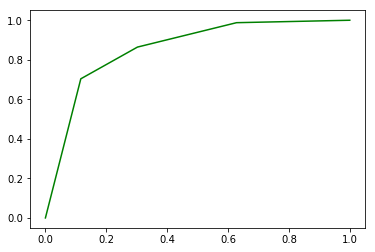

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline

fpr, tpr, thresholds = metrics.roc_curve(y_test,kNN.predict_proba(x_test)
[:,1],pos_label=1)
plt.plot(fpr,tpr,color = "green")
print ("kNN AUC = ", metrics.auc(fpr,tpr))

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predicted = gnb.predict(x_test)
probs = gnb.predict_proba(x_test)
#probs

NB auc =  0.861326442722


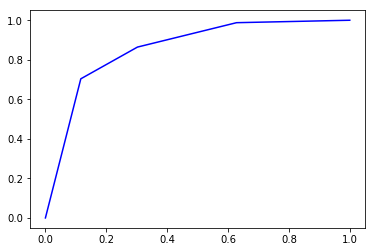

In [21]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="blue")
print("NB auc = ", metrics.auc(fpr2, tpr2))

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
probs = model.predict_proba(x_test)
#probs

LogisticRegression auc =  0.887166236003


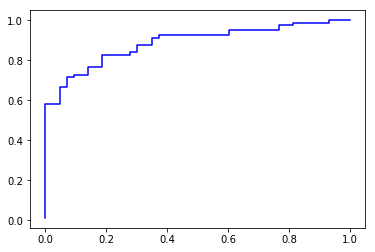

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="blue")
print("LogisticRegression auc = ", metrics.auc(fpr, tpr))